**Import the following libraries**

- pandas for managing the data.

- numpy for mathematical operations.

- seaborn for visualizing the data.

- matplotlib for visualizing the data.

- sklearn for machine learning and machine-learning-pipeline related functions.

- scipy for statistical computations.

In [36]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [37]:
#Reading data from .csv files
file_path = 'C:/Users/HP/Desktop/Machine Learning/car_price_data_set.csv'
data = pd.read_csv(file_path)
#print(data.head())  # Display the first few rows of the dataset
print(data.iloc[:5, :5])  # Display the first 5 rows and 5 columns of the dataset

            Make                            Model    Price  Year  Kilometer
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000
3         Toyota                         Glanza G   799000  2019      37500
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000


In [4]:
#Useful argumetnts for read_csv
# - sep: Specify the delimiter used in the file (default is ',').
data = pd.read_csv(file_path, sep=',')  # For comma-separated values
data = pd.read_csv(file_path, sep=';')  # For semicolon-separated values
data = pd.read_csv(file_path, sep='\t')  # For tab-separated values
data = pd.read_csv(file_path, sep=' ')  # For space-separated values    

#whitespace separated values
data = pd.read_csv(file_path, delim_whitespace=True)  # For whitespace-separated values

#don't use the first row as header
data = pd.read_csv(file_path, header=None)  # Treat the first row as data

ParserError: Error tokenizing data. C error: Expected 12 fields in line 6, saw 14


In [ ]:
#Reading JSON files
data_json = pd.read_json('data/titanic-parquet.json', lines=True)  # Read a JSON file with multiple JSON objects
print(data_json.head()) 
'''for index, row in data_json.iterrows():
    print(row.to_dict())'''

In [32]:
data.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                       --------------  ----- 
 0   Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine (cc),Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity  2059 non-null   object
dtypes: object(1)
memory usage: 16.2+ KB


According to the output above, we have 2059 entries, 0 to 2058, as well as 20 features. The "Non-Null Count" column shows the number of non-null entries. If the count is 2059 then there is no missing values for that particular feature. 'Price' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (3 int64 and 5 float64) and 12 object data types.

The **describe()** function reveals the statistical information about the **numeric attributes.** To reveal same information about **categorical (object) attributes**, we can use **value_counts()** function. 

In [39]:
data["Price"].describe()  # Get summary statistics for the "Price" column
#data["Model"].value_counts()  # Calculate the mean of the "Price" column

count    2.059000e+03
mean     1.702992e+06
std      2.419881e+06
min      4.900000e+04
25%      4.849990e+05
50%      8.250000e+05
75%      1.925000e+06
max      3.500000e+07
Name: Price, dtype: float64

- count: Number of non-null entries (fields/cells in a dataset that contain valid, populated data thus not empty, **NaN, None, or missing**)
- mean: average price
- std: high standard deviation --> prices vary widely
- min: Lowest price value. (Not zero thus no invalid data)
- 25%: 25th percentile (25% of prices <= 484k)
- 50%: Median
- 75%: 75th percentile
- max: Highest price

### **Correlations**

Before proceeding with the data cleaning, it is useful to establish a correlation between the target variable (in our case price) and other predictor variables, as some of them might not have any major impact in determining the price of the car and will not be used in the analysis.  

There are many ways to discover correlation between the target variable and the rest of the features. 

Building; 
- pair plots, 
- scatter plots, 
- heat maps, 
- correlation matrixes are the most common ones. 

Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the `numerical attributes (floats and integers)`, therefore, only the numeric attributes will be selected.

In [41]:
numerical_in_data = data.select_dtypes(include = ['float64', 'int64'])
numerical_in_data_corr = numerical_in_data.corr()['Price']  
top_features = numerical_in_data_corr[abs(numerical_in_data_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print(f"There is {len(top_features)} strongly correlated values with Price:\n{top_features}")
#print(numerical_in_data)
#print(len(numerical_in_data.columns))
#print(numerical_in_data_corr)

There is 5 strongly correlated values with Price:
Price                 1.000000
Engine (cc)           0.615328
Fuel Tank Capacity    0.584631
Width                 0.563996
Length                0.556741
Name: Price, dtype: float64


there are 5 features, with coefficients greater than 0.5, that are strongly correlated with the price.

### **Visual inspection** 

Visually inspecting the correlation between the features and the target with pair plots.

use seaborns `_sns.pairplot()_`function

Pair plots also help in identifying outliers

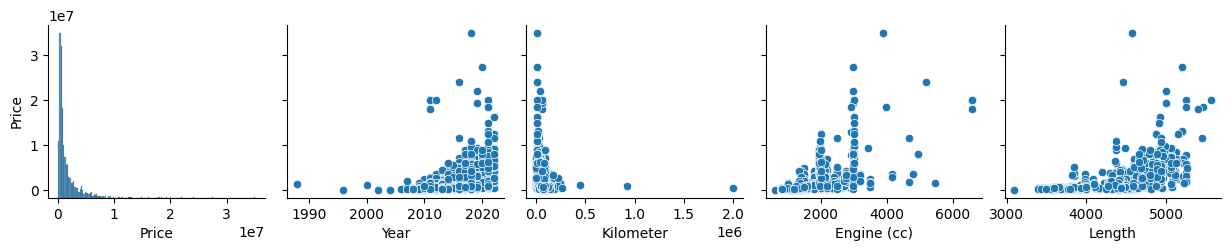

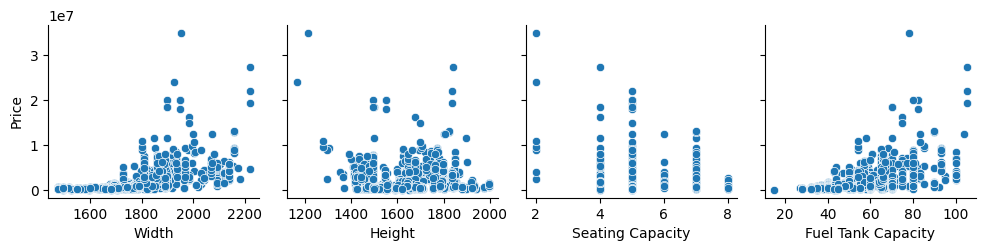

In [44]:
for i in range(0, len(numerical_in_data.columns), 5):
    sns.pairplot(data=numerical_in_data,
                x_vars=numerical_in_data.columns[i:i+5],
                y_vars=['Price'])

### **Log Transformation**

In this section, we are going to inspect whether our 'Price' data is normally distributed. 

The assumption of the normal distribution must be met in order to perform any type of regression analysis. 

There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'Price' distribution using the `histtplot()` function from the seaborn library.

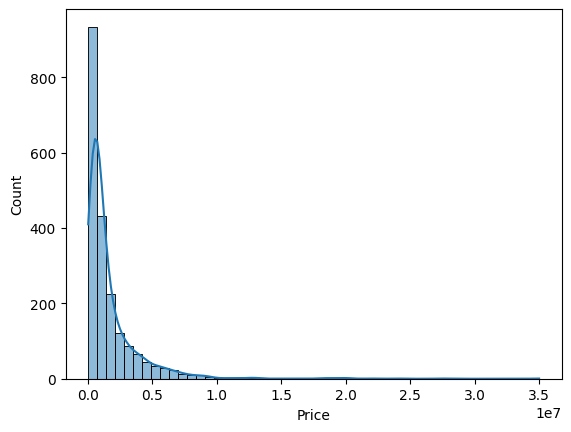

In [47]:
#initial_price_plot = sns.histplot(data['Price'], kde=True)
initial_price_plot = sns.histplot(data['Price'], kde=True, bins=50) #kde=True adds a kernel density estimate


Kernel Density Estimate (KDE) is a non-parametric way to estimate the probability density function of a random variable. It is used to visualize the distribution of data and identify patterns, such as peaks or gaps, in the data. KDE smooths the data points using a kernel function (commonly Gaussian) to create a continuous curve that represents the density of the data.

As the plot shows, our 'Price' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew.

In statistics **skewness** is a measure of asymmetry of the distribution. 

In addition to skewness, there is also a **kurtosis**, parameter which refers to the pointedness of a peak in the distribution curve. 

Both `skewness and kurtosis` are frequently used together to characterize the distribution of data.

In [48]:
#use skew() to check for skewness level of Price
print(f"Skewness of Price: {data['Price'].skew()}")

Skewness of Price: 4.965142885156478



The range of skewness for a;

- fairly symmetrical bell curve distribution is between -0.5 and 0.5

- moderate skewness is -0.5 to -1.0 and 0.5 to 1.0

- highly skewed distribution is < -1.0 and > 1.0. 

In our case, we have **~4.9**, so it is considered highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the np.log() function from the numpy library to perform log transform. 

In [49]:
log_transformed_price = np.log(data['Price'])

In [ ]:
initial_price_plot = sns.histplot(log_transformed_price, kde=True)

In [ ]:
print("Skewness: %f" % (log_transformed_price).skew())

As we can see, the log method transformed the 'Price' distribution into a more symmetrical bell curve and the skewness level now is 0.485859, well within the range.

There are other ways to correct for skewness of the data. For example, `Square Root Transform (np.sqrt)` and the `Box-Cox Transform (stats.boxcox)` from the scipy stats library. 

**Handling Duplicates**

We will use pandas duplicated() function and search by the 'Model' column, which contains a unique index number for each entry.


In [ ]:
#check if there are any duplicate indexes in the dataset
data.index.is_unique  # Returns True if all index values are unique, False otherwise

In [ ]:
duplicate = data[data.duplicated(['Model'])]
duplicate
#duplicates = data[data.duplicated(subset=['Make', 'Model', 'Year', 'Kilometer'], keep=False)]
#duplicates


As we can see, there are 1009 duplicate rows in this dataset. To remove them, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.

In [ ]:
dup_removed = data.drop_duplicates()
dup_removed 

**Handling the missing values**

For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` 'functions.

To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot them, using the `bar plot` function from the `matplotlib` library.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

**Dropping missing values**

In [ ]:
#drop the rows with missing values
data_dropped = data.dropna()
print(f"Number of rows after dropping missing values: {len(data_dropped)}")

# #drop all rows with missing values in the 'Price' column
# data_dropped_price = data.dropna(subset=['Price'])
# print(f"Number of rows after dropping missing values in 'Price': {len(data_dropped_price)}")

# #drop a whole column with missing values
# data_dropped_column = data.drop(columns=['Make'])
# print(f"Number of columns after dropping 'Make': {len(data_dropped_column.columns)}")

**Filling missing values**

In [ ]:
#fill missing values with the mean of the column
# data_filled_mean = data.fillna(data.mean())
# print(f"Number of rows after filling missing values with mean: {len(data_filled_mean)}")        

# fill missing values with the median of the column
# data_filled_median = data.fillna(data.median())
# print(f"Number of rows after filling missing values with median: {len(data_filled_median)}")    

# #fill missing values with the mode of the column
# data_filled_mode = data.fillna(data.mode().iloc[0])
# print(f"Number of rows after filling missing values with mode: {len(data_filled_mode)}")    

#fill missing values with a constant value
data_filled_constant = data.fillna(0)
print(f"Number of rows after filling missing values with constant: {len(data_filled_constant)}")

# #fill missing values with the previous value in the column
# data_filled_ffill = data.fillna(method='ffill')
# print(f"Number of rows after filling missing values with forward fill: {len(data_filled_ffill)}")   

# #fill missing values in a specific column with the mean of that column
# data['Price'] = data['Price'].fillna(data['Price'].mean())
# print(f"Number of rows after filling missing values in 'Price' with mean: {len(data)}")

### **Feature scaling**

One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs.

In [ ]:
#normalize the data

normalized_data = MinMaxScaler().fit_transform(numerical_in_data)
normalized_data

In [ ]:
#standardize the data
standardized_data = StandardScaler().fit_transform(numerical_in_data)
standardized_data

# #standidze a particular column
# standardized_price = StandardScaler().fit_transform(data[['Price']])
# standardized_price

### **Handling outliers**

In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 


### **Univariate Analysis**

A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points.

In [ ]:
#use box plot for univariate analysis of price
sns.boxplot(x=data['Price'])


In [ ]:
#plot box plot for all numerical columns
for col in numerical_in_data.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
#plot box plot for features above 0.5 correlation with Price
for col in top_features.index:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


As we can see from these plots, we have some points that are plotted outside the box plot area that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed.

### **Bi-variate analysis**

Next, we will look at the bi-variate analysis of the two features, the car price, 'Price', and the engine capacity, 'Engine (cc)', and plot the scatter plot of the relationship between these two parameters.


In [ ]:
#retrieve columns with Pearson correlation greater than 0.5 and print them
correlated_columns = top_features.index.tolist()
print("Columns with Pearson correlation greater than 0.5:", correlated_columns)

In [ ]:
price_area = data.plot.scatter(x='Engine (cc)',
                      y='Price')

From the above graph, we can see values that deviate from the general trend both on the x and y axes. 

### **Deleting outliers**

In [ ]:
#first sort the data by 'Engine (cc)' and select the last 3
data.sort_values(by = 'Engine (cc)', ascending = False)[:3]

In [ ]:
#use the pandas drop() function to delete the outliers
outliers_droped = data.drop(data.index[[977,1246,1369]])

In [ ]:
new_price_area = outliers_droped.plot.scatter(x='Engine (cc)',
                      y='Price')